In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd

df = pd.read_csv('../csv/merged_data.csv')

numerical_features = ['temp','visibility','dew_point','feels_like','pressure','humidity','wind_speed','wind_deg','wind_gust','rain_1h','snow_1h','clouds_all','weather_id', 'year','month','day']
X = df[numerical_features]
y = df['aqi']

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize the Random Forest Regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators is the number of trees

# Fit the model to the training data
random_forest_regressor.fit(X_train, y_train)



/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_31410/3758893112.py:9: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/merged_data.csv')


RandomForestRegressor(random_state=42)

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

# Make predictions on the test data
predictions = random_forest_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")
rmse = sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")


Mean Squared Error: 127.21134678333598
Mean Absolute Error: 7.028541971348146
Root Mean Squared Error: 11.27880076884666
R-squared: 0.47777156015857525


In [ ]:
with open('random_forest_metrics.txt', 'w') as file:
    file.write(f"Mean Absolute Error (MAE): {mae}\n")
    file.write(f"Mean Squared Error (MSE): {mse}\n")
    file.write(f"Root Mean Squared Error (RMSE): {rmse}\n")
    file.write(f"R-Squared (R²): {r2}\n")

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
from joblib import dump
from math import sqrt

def perform_random_forest_regression(X, y, cityname):
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    X = imputer.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    with open('random_forest_results_' + cityname + '.txt', 'w') as file:
        file.write(f"Mean Absolute Error: {mae:.2f}\n")
        file.write(f"Mean Squared Error: {mse:.2f}\n")
        file.write(f"Root Mean Squared Error: {rmse:.4f}\n")
        file.write(f"R^2 Score: {r2:.4f}\n")

    return rf_model

def removeMissingRows(df, column_names):
    df = df.dropna(subset=column_names)
    return df

cities = ['Bakersfield', 'Los_Angeles', 'New_York', 'Phoenix', 'Reno', 'Visalia', 'Denver', 'Boston']
for city in cities:
    df = pd.read_csv('../csv/final_merged_data/merged_data_' + city + '.csv')
    numerical_features = ['temp', 'visibility', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_id', 'year', 'month', 'day']
    df = removeMissingRows(df, numerical_features + ['aqi'])  # Include 'aqi' in the check for NaNs
    X = df[numerical_features]
    y = df['aqi']
    rf_model = perform_random_forest_regression(X, y, city)
    dump(rf_model, 'random_forest_model_' + city + '.joblib')
    print(f'Random forest model and results saved for {city}')


/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5208/4029322066.py:44: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_' + city + '.csv')


Random forest model and results saved for Bakersfield


/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5208/4029322066.py:44: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_' + city + '.csv')


Random forest model and results saved for Los_Angeles


/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5208/4029322066.py:44: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_' + city + '.csv')


Random forest model and results saved for New_York


/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5208/4029322066.py:44: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_' + city + '.csv')


Random forest model and results saved for Phoenix


/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5208/4029322066.py:44: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_' + city + '.csv')


Random forest model and results saved for Reno
Random forest model and results saved for Visalia


/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5208/4029322066.py:44: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_' + city + '.csv')


Random forest model and results saved for Denver


/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5208/4029322066.py:44: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_' + city + '.csv')


Random forest model and results saved for Boston


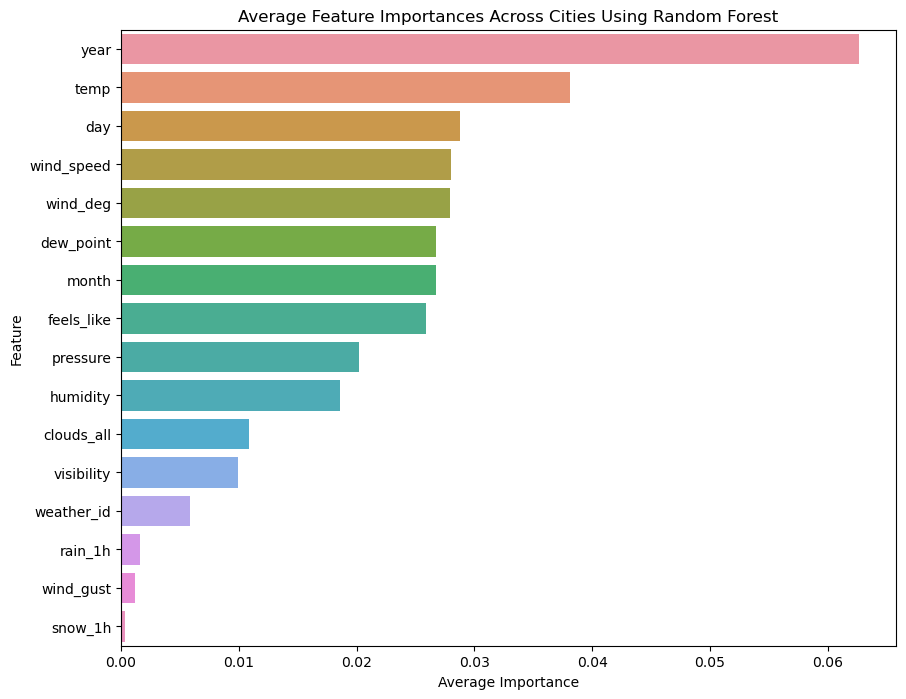

In [1]:
from joblib import load
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

cities = ['Bakersfield', 'Los_Angeles', 'New_York', 'Phoenix', 'Reno', 'Visalia', 'Denver', 'Boston']
features = ['temp', 'visibility', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_id', 'year', 'month', 'day']

# Initialize a DataFrame to store feature importances across all cities
importance_data = pd.DataFrame(0, index=np.arange(len(features)), columns=features)

for city in cities:
    # Load the pre-trained random forest model
    rf_model = load(f'../results/random_forest/random_forest_model_{city}.joblib')

    # Get feature importances from the model
    importances = rf_model.feature_importances_

    # Add current city's importances to the total
    importance_data.loc[city] = importances

# Calculate the average importance for each feature across all cities
average_importances = importance_data.mean(axis=0)

# Create a DataFrame from the average importances
average_importances_df = pd.DataFrame({'Feature': features, 'Average Importance': average_importances})

# Sort features by average importance
average_importances_df = average_importances_df.sort_values(by='Average Importance', ascending=False)

# Create a bar plot of average feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Average Importance', y='Feature', data=average_importances_df)
plt.title('Average Feature Importances Across Cities Using Random Forest')
plt.xlabel('Average Importance')
plt.ylabel('Feature')
plt.show()
